# Reinforcement Learning

Galen Wilkerson

From Tutorial:
http://amunategui.github.io/reinforcement-learning/

In [12]:
import numpy as np
import pylab as plt

%matplotlib notebook

import networkx as nx
from IPython.display import Math, HTML, display, Latex
from sympy import *


## Functions

In [13]:
def plotG(G, title = ''):
    plt.figure()
    plt.title(title);
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G,'weight')
    for key in labels.keys():
        labels[key] = round(labels[key])
    nx.draw(G, pos)
    nx.draw_networkx_labels(G,pos)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);
    
def createGraph(edge_list, goal = 7):

    G=nx.Graph()
    G.add_edges_from(edge_list)
    return(G)

def initR(edge_list, MATRIX_SIZE = 8, goal = 7):
         
    # assign zeros to paths and 100 to goal-reaching edge

    # how many edges in graph? x edges


    # create matrix x*y
    R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
    R *= -1

    for edge in edge_list:
        #print(edge)
        if edge[1] == goal:
            R[edge] = 100
        else:
            R[edge] = 0

        if edge[0] == goal:
            R[edge[::-1]] = 100
        else:
            # reverse of edge
            R[edge[::-1]]= 0

    # add goal edge round trip
    R[goal,goal]= 100
    
    return(R)


def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_actions_range,1))
    return next_action

def update(my_Q, my_R, current_state, action, gamma):
    max_index = np.where(my_Q[action,] == np.max(my_Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = my_Q[action, max_index]

    my_Q[current_state, action] = my_R[current_state, action] + gamma * max_value
    #print('max_value', my_R[current_state, action] + gamma * max_value)

    if (np.max(my_Q) > 0):
        return(np.sum(my_Q/np.max(my_Q)*100), my_Q)
    else:
        return (0, my_Q)
    
def training(R, MATRIX_SIZE = 8, gamma = 0.8):
    # learning parameter
    #gamma = 0.8

    
    Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

    
    # Training
    scores = []
    for i in range(700):
        current_state = np.random.randint(0, int(Q.shape[0]))
        available_act = available_actions(current_state)
        action = sample_next_action(available_act)
        score, Q = update(Q, R, current_state,action,gamma)
        scores.append(score)
        #print ('Score:', str(score))
    
    return(scores, Q)

def testing(Q, current_state = 0):
    # Testing
    #current_state = 0
    steps = [current_state]

    while current_state != 7:

        next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

        if next_step_index.shape[0] > 1:
            next_step_index = int(np.random.choice(next_step_index, size = 1))
        else:
            next_step_index = int(next_step_index)

        steps.append(next_step_index)
        current_state = next_step_index
        
    return(steps)

def plotScores(scores, title = ''):
    plt.figure()
    plt.plot(scores)
    plt.xlabel('steps')
    plt.ylabel('score')
    plt.title(title)
    plt.show()
    
def show_latex_matrix(matrix1, pre_latex = "", post_latex = ""):
    '''
    '''
    
    display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))

    return(Math(pre_latex + latex(Matrix(matrix1)) + post_latex))

## The graph

<IPython.core.display.Javascript object>


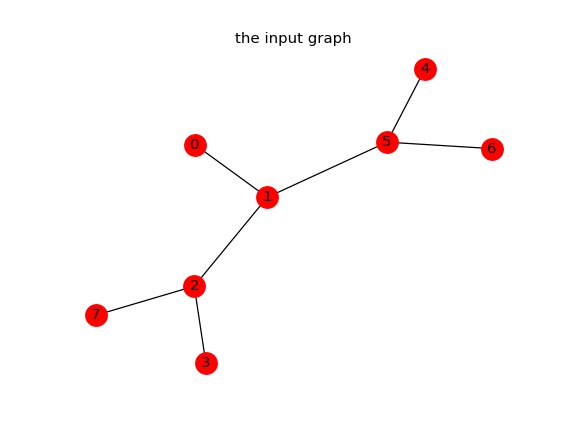

In [14]:
edge_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

MATRIX_SIZE = 8
goal = 7

G = createGraph(edge_list, goal)
plotG(G, 'the input graph')

In [15]:
# train the R edge cost matrix
R = initR(edge_list, MATRIX_SIZE, goal)
show_latex_matrix(R)

<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


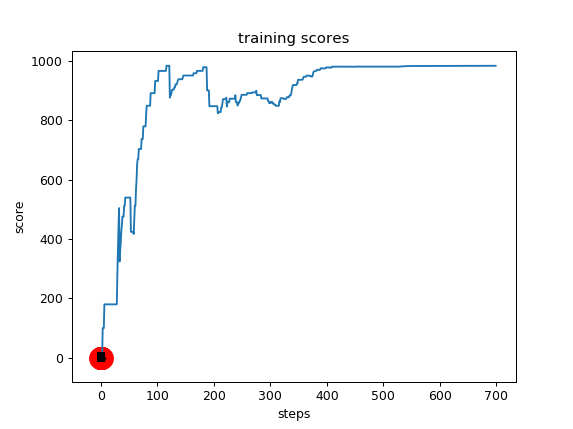

In [19]:
# train the Q path cost matrix
scores, Q = training(R)

plotScores(scores, 'training scores')

In [23]:
print("Trained normalized Q matrix:")
Q_normed = (Q/np.max(Q)*100).round(3)
show_latex_matrix(Q_normed)

Trained normalized Q matrix:


<IPython.core.display.Math object>

In [28]:
steps = testing(Q, current_state = 0)

print("Most efficient path:")
print(steps)

Most efficient path:
[0, 1, 2, 7]


<IPython.core.display.Javascript object>


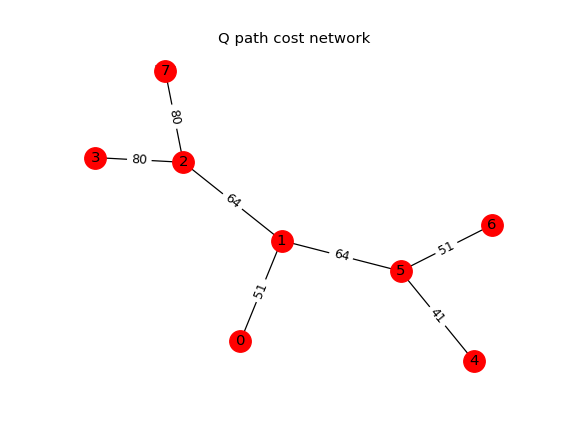

In [29]:
Q_graph = nx.from_numpy_matrix(Q_normed)
plotG(Q_graph, 'Q path cost network')